In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [24]:
# Load Dataset
data = {
    'Date': pd.date_range(start='2024-01-01', periods=10, freq='D'),
    'Region': ['Region A']*5 + ['Region B']*5,
    'Confirmed_Cases': [100, 150, 200, 250, 300, 50, 60, 70, 80, 90],
    'Recovered_Cases': [50, 80, 120, 150, 200, 30, 40, 50, 60, 70],
    'Deaths': [5, 7, 10, 12, 15, 2, 3, 4, 5, 6]
}
df = pd.DataFrame(data)
print(df)

        Date    Region  Confirmed_Cases  Recovered_Cases  Deaths
0 2024-01-01  Region A              100               50       5
1 2024-01-02  Region A              150               80       7
2 2024-01-03  Region A              200              120      10
3 2024-01-04  Region A              250              150      12
4 2024-01-05  Region A              300              200      15
5 2024-01-06  Region B               50               30       2
6 2024-01-07  Region B               60               40       3
7 2024-01-08  Region B               70               50       4
8 2024-01-09  Region B               80               60       5
9 2024-01-10  Region B               90               70       6


In [25]:
# Calculate rolling averages (3-day window for examples)
df['Rolling Confirmed'] = df.groupby('Region')['Confirmed_Cases'].rolling(window=3).mean().reset_index(0, drop=True)
df['Rolling Recovered'] = df.groupby('Region')['Recovered_Cases'].rolling(window=3).mean().reset_index(0, drop=True)
df['Rolling Deaths'] = df.groupby('Region')['Deaths'].rolling(window=3).mean().reset_index(0, drop=True)

In [26]:
# Prepare data for anomaly detection
features = ['Confirmed_Cases', 'Recovered_Cases', 'Deaths']
df_for_model = df[features]

In [27]:
# Apply isolation forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
df['Anomaly'] = iso_forest.fit_predict(df_for_model)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


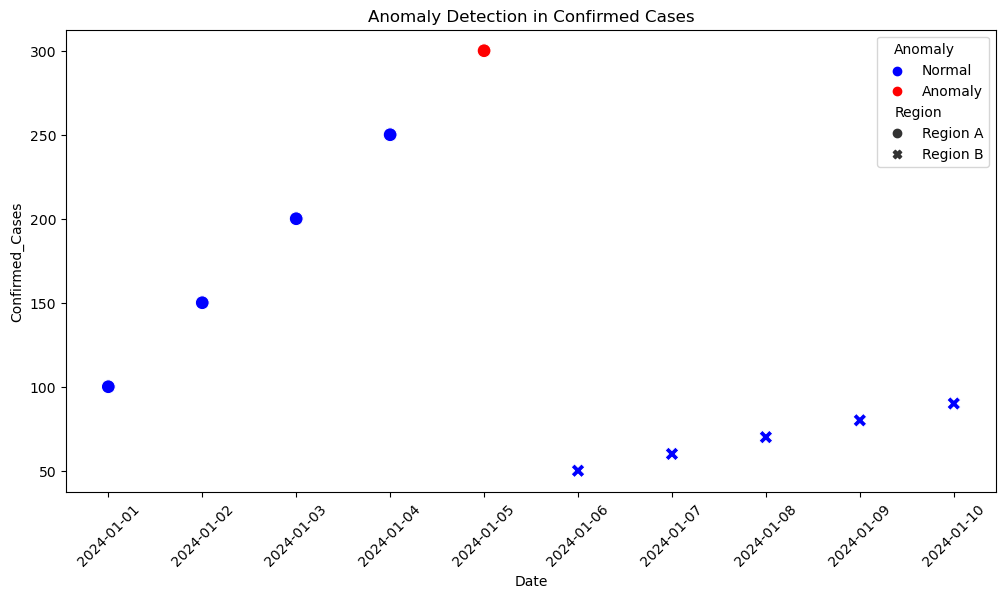

In [31]:
# Map the numeric anomaly values to 'Normal' and 'Anomaly'
df['Anomaly'] = df['Anomaly'].map({1: 'Normal', -1: 'Anomaly'})

# Now plot the data
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x='Date',
    y='Confirmed_Cases',
    hue='Anomaly',   # 'Anomaly' will be either 'Normal' or 'Anomaly'
    style='Region',
    palette={'Normal': 'blue', 'Anomaly': 'red'},  # Ensure the correct mapping of colors
    s=100
)
plt.title('Anomaly Detection in Confirmed Cases')
plt.xticks(rotation=45)
plt.show()
